In [1]:
import pathlib
import re
from typing import Dict, List, Union

import matplotlib.pyplot as plt
import pandas as pd

import utils

utils.set_plot_formatting()

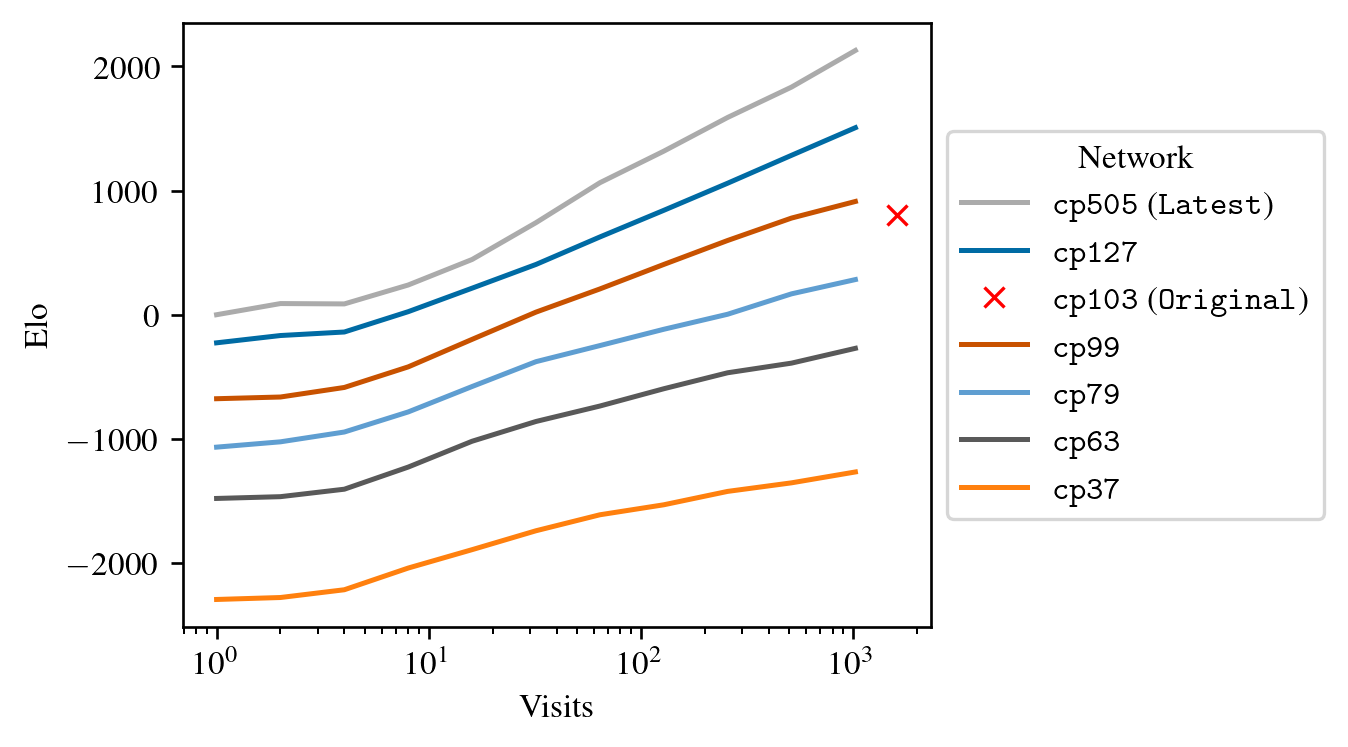

In [2]:
fig, axs = plt.subplots(
    1, 1, constrained_layout=True, figsize=(utils.ONE_COL_PLOT_WIDTH, 3), dpi=240
)
plt.subplot(1, 1, 1)

match_path = pathlib.Path("/nas/ucb/tony/go-attack/matches/visit-exp3/summary.txt")
lines = match_path.read_text().splitlines()
elo_lines_start_idx = lines.index("Elos (+/- one approx standard error):")
elo_lines_end_idx = lines.index(
    "Pairwise approx % likelihood of superiority of row over column:"
)
elo_lines = lines[elo_lines_start_idx + 1 : elo_lines_end_idx]
# elo_lines.append("cp103-v1600         :   128.86 +/- 13.25")

bot_entries: List[Dict[str, Union[float, int, str]]] = []
for elo_line in elo_lines:
    name = elo_line.split(" ")[0]
    entry = {
        "name": name,
        "rank": name[3] if "bot" in name else name.split("-")[0],
        "visits": int(name.split("-v")[1]),
        "elo": float(elo_line.split(":")[1].split("+/-")[0]) - 483.746,
        "std": float(elo_line.split("+/-")[1]) - 483.746,
    }
    if "cp127" not in entry["rank"]:
        bot_entries.append(entry)

match_path = pathlib.Path("/nas/ucb/tony/go-attack/matches/cp127-vs-cp505/summary.txt")
lines = match_path.read_text().splitlines()
elo_lines_start_idx = lines.index("Elos (+/- one approx standard error):")
elo_lines_end_idx = lines.index(
    "Pairwise approx % likelihood of superiority of row over column:"
)
elo_lines = lines[elo_lines_start_idx + 1 : elo_lines_end_idx]

for elo_line in elo_lines:
    name = elo_line.split(" ")[0]
    entry = {
        "name": name,
        "rank": name[3] if "bot" in name else name.split("-")[0],
        "visits": int(name.split("-v")[1]),
        "elo": float(elo_line.split(":")[1].split("+/-")[0]) + 591.59,
        "std": float(elo_line.split("+/-")[1]) + 591.59,
    }
    # if 'cp505' in entry['rank']:
    bot_entries.append(entry)

df = pd.DataFrame(bot_entries)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print('df', df)
for rank in sorted(df["rank"].unique()):
    df[df["rank"] == rank].groupby("visits").mean(numeric_only=True).elo.plot(
        label=rank
    )
plt.plot(1600, 800.31, "rx", label="cp103")
plt.ylabel("Elo")
plt.xlabel("Visits")
plt.xscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(
    *sorted(zip(labels, handles), key=lambda t: int(t[0].split("p")[1]))
)
handles = list(handles)[::-1]
labels = list(labels)[::-1]
for i in range(len(labels)):
    orig_label = labels[i]
    labels[i] = f"$\\texttt{{{orig_label}}}$"
    if orig_label == "cp505":
        labels[i] += " ($\\texttt{Latest}$)"
    elif orig_label == "cp103":
        labels[i] += " ($\\texttt{Original}$)"
plt.legend(
    handles,
    labels,
    title="Network",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fancybox=True,
)

plt.savefig("elo-by-visits.pgf", backend="pgf")

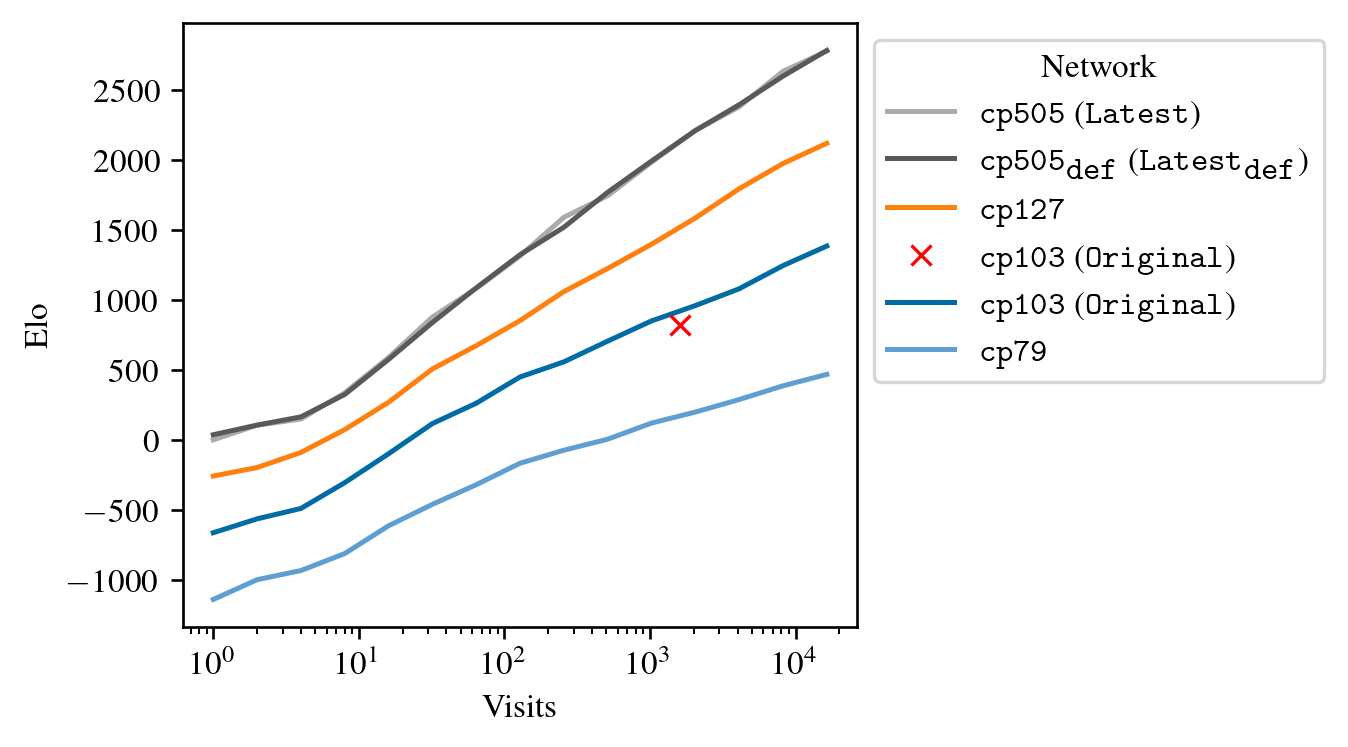

In [3]:
# Elo curve again, but with updated match configs that are closer to the original KataGo configs

fig, axs = plt.subplots(
    1,
    1,
    constrained_layout=True,
    figsize=(utils.ONE_COL_PLOT_WIDTH, 3),
    dpi=240,
)
plt.subplot(1, 1, 1)

match_path = pathlib.Path("/nas/ucb/ttseng/go_attack/match/elo-221115/summary.txt")
lines = match_path.read_text().splitlines()
elo_lines_start_idx = lines.index("Elos (+/- one approx standard error):")
elo_lines_end_idx = lines.index(
    "Pairwise approx % likelihood of superiority of row over column:"
)
elo_lines = lines[elo_lines_start_idx + 1 : elo_lines_end_idx]

bot_entries: List[Dict[str, Union[float, int, str]]] = []
for elo_line in elo_lines:
    name = elo_line.split(" ")[0]
    entry = {
        "name": name,
        "rank": name[3] if "bot" in name else name.split("-")[0],
        "visits": int(name.split("-v")[1]),
        "elo": float(elo_line.split(":")[1].split("+/-")[0]) + 635.523,
        "std": float(elo_line.split("+/-")[1]) + 635.523,
    }
    bot_entries.append(entry)

df = pd.DataFrame(bot_entries)
for rank in sorted(df["rank"].unique()):
    df[df["rank"] == rank].groupby("visits").mean(numeric_only=True).elo.plot(
        label=rank
    )
plt.plot(1600, 822.746, "rx", label="cp103")
plt.ylabel("Elo")
plt.xlabel("Visits")
plt.xscale("log")
handles, labels = plt.gca().get_legend_handles_labels()


def label_to_key(label):
    checkpoint_num = int(re.sub("[^0-9]", "", label))
    is_hardened = label[-1] == "h"
    return checkpoint_num - (0.5 if is_hardened else 0)


labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: label_to_key(t[0])))
handles = list(handles)[::-1]
labels = list(labels)[::-1]
for i in range(len(labels)):
    orig_label = labels[i]
    labels[i] = f"$\\texttt{{{orig_label}}}$"
    if orig_label == "cp505":
        labels[i] += " ($\\texttt{Latest}$)"
    elif orig_label == "cp505h":
        labels[i] = "$\\texttt{cp505}_\\texttt{def}$ ($\\texttt{Latest}_\\texttt{def}$)"
    elif orig_label == "cp103":
        labels[i] += " ($\\texttt{Original}$)"
plt.legend(
    handles,
    labels,
    title="Network",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    fancybox=True,
)

plt.savefig("elo-by-visits-2.pgf", backend="pgf")

# TODO(tomtseng):
# * rerun this after /nas/ucb/ttseng/go_attack/match/elo-221115/ is actually done
# * shift everything to put cp505-v1 at 0
# * remove cp103 red x assuming it matches up (after shifting)